# Demonstration of Interatomic Potential Testing Framework

**James Kermode**
<br>
March 2021

Data and code available from https://github.com/libAtoms/testing-framework

Running Model:
```bash

```


In [182]:
import itertools
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nglview
import matplotlib.pyplot as plt
import seaborn as sns

from ase.io import read

sns.set_context('talk')

os.chdir(os.path.expanduser('/home/lls34/GitHub/01_PhD/PhD_Code/submodules/testing-framework/testing-framework/example_models/In2O3/run_dir'))
! [[ ! -d ../tests ]] && ln -s ~/tests/Si ../tests

ln: failed to create symbolic link '../tests': File exists


In [181]:
import seaborn as sns

## Energy-Volume curves

We can read in the existing data:

In2O3-model-DFT_QE-test-bulk_In2O3_Ia3-properties

In [66]:
def read_data(model_names, sym='Ia3', raise_error=True):
    data = {}
    for model_name in model_names:
        json_file = f"In2O3-model-{model_name}-test-bulk_In2O3_{sym}-properties.json"
        #model_name = os.path.basename(json_file).split('-')[2]
        
        if not os.path.exists(json_file):
            print(f'Json file for model and test doesnt exist: {json_file}')
            if raise_error:
                raise FileNotFoundError(f'Json file doesnt exist: {fname}')
            else:
                # Move on to next model 
                continue
                
        data[model_name] = json.load(open(json_file))
    return data

Now we define some simple functions to plot energy volume curves for the reference DFT and GAP models. Here we fit a quartic polynomial to the data.

In [67]:
#data


In [308]:
def polyplot(ax, V, E, color, label):
    y = E #- (-1128.25) #- E.min()
    p = np.polyfit(np.array(V, dtype=float), np.array(y,dtype=float), 4)
    v = np.linspace(V.min(), V.max(), 100)
    e = np.polyval(p, v)
    ax.plot(V, y, color+'.', label=label+' data')
    ax.plot(v, e, color+'-', label=label+' fit')

def plot_e_vs_v(all_data, ref_model_name, colors=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,8))
    #polyplot(ax, ref_E_vs_V[:,0], ref_E_vs_V[:,1], 'k', ref_model_name)
    
    if colors is None:
        colors = ['C0', 'C1', 'C2', 'C3', 'C4']
        
    for i, model_name in enumerate(all_data): 
        color =  colors[i%len(colors)]
        if model_name == ref_model_name:
            color='k'
        data = all_data[model_name]
        E_vs_V = np.array(data['E_vs_V'], dtype=object)
        V = E_vs_V[:, 0].astype(float)
        E = E_vs_V[:, 1].astype(float)
        polyplot(ax, V, 
                 E ,#- E.min(), 
                 color, model_name)        
    

    ax.set_xlabel(r'Volume / $\mathrm{\AA}^3$')
    ax.set_ylabel('Energy / eV')
    ax.legend()
    
    return ax



In [309]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
for i, model_name in enumerate(data): 
    print(model_name, colors[i%len(colors)])

GAP_it1_50s C0
GAP_itB_1_a C1
GAP_itB_1_b C2
GAP_itB_1_c C3


# Volume density analysis

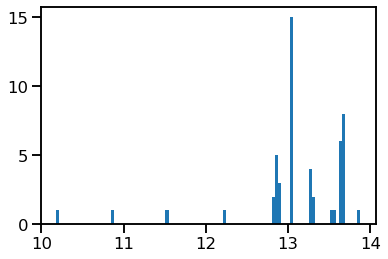

In [310]:
ats = read('/data/lls34/Data/In2O3/In2O3_LS_1/04_QE2/02_Ameliorate_GAP/02_Itterative/03_Bulk/Volume_Curves/It1/Train/Data_c_DFT_train.xyz', ':')
vols = []
for at in ats:
    if at.info['type'].lower() == 'bulk':
        vols.append(at.get_volume()/at.get_global_number_of_atoms())
        
plt.hist(vols, bins=100);

# Running analysis

Trying Symetry: Ia3
DFT_QE


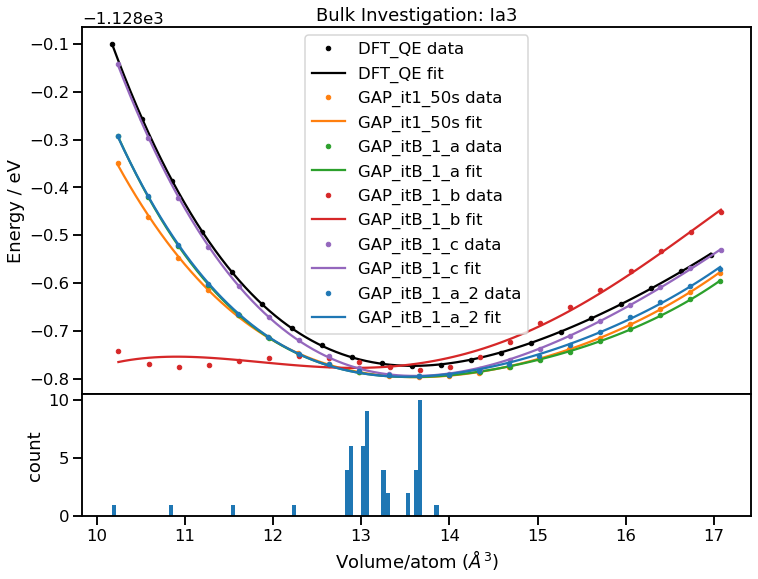

Trying Symetry: R3c
DFT_QE


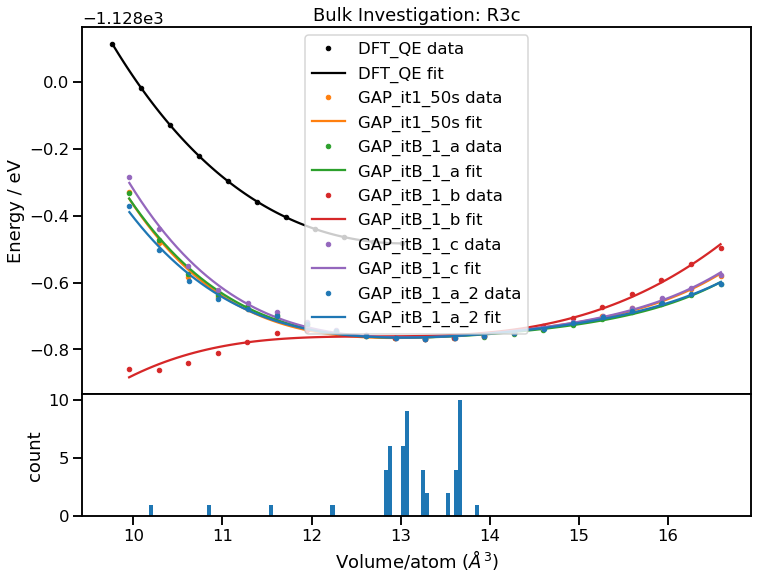

Trying Symetry: Pbca
Json file for model and test doesnt exist: In2O3-model-DFT_QE-test-bulk_In2O3_Pbca-properties.json
DFT_QE


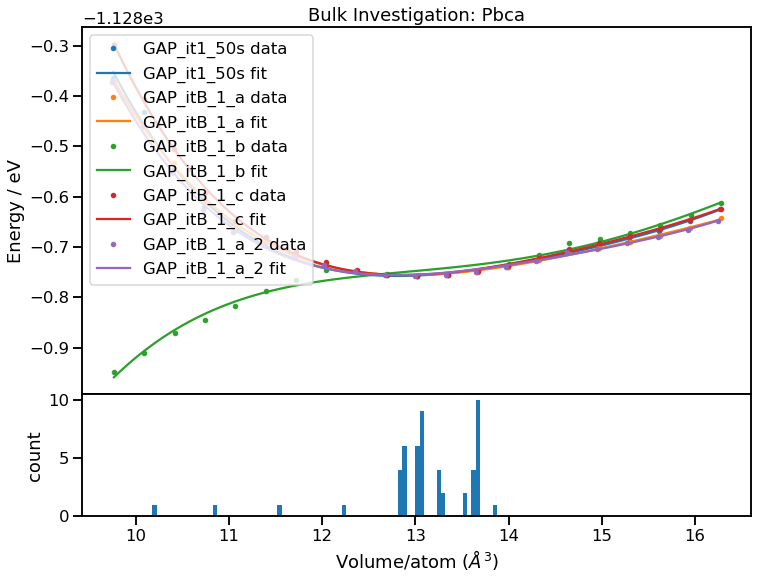

Trying Symetry: Pbcn
Json file for model and test doesnt exist: In2O3-model-DFT_QE-test-bulk_In2O3_Pbcn-properties.json
DFT_QE


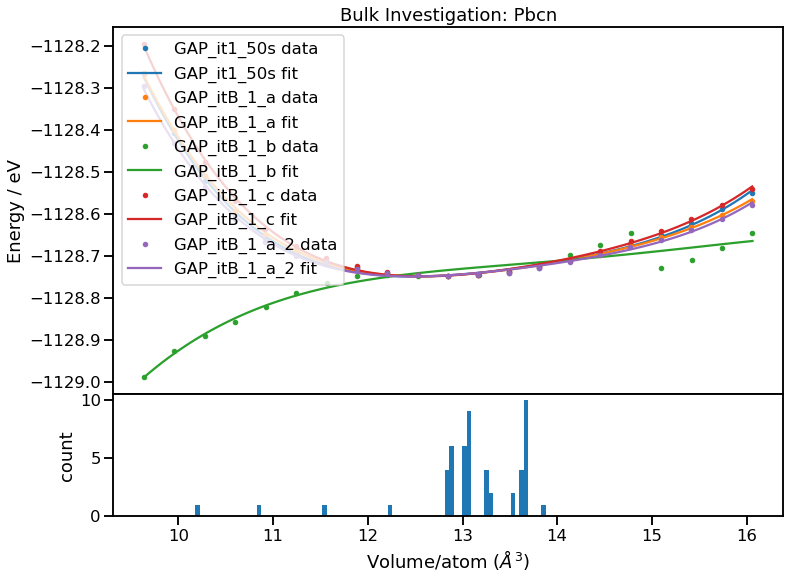

In [313]:
syms = ['Ia3', 'R3c','Pbca', 'Pbcn']
models = ['DFT_QE', 
          'GAP_it1_50s', 
          'GAP_itB_1_a','GAP_itB_1_b', 'GAP_itB_1_c','GAP_itB_1_a_2'
         ]
for sym in syms:
    fig, axs = plt.subplots(2,1, figsize=(12,9), gridspec_kw={'height_ratios':[3,1]}, sharex=True)
    
    print(f'Trying Symetry: {sym}')
    data = read_data(models, sym=sym, raise_error=False) 
    models_sym = [i for i in models if np.isin(i, list(data.keys())) ]
    ref_model_name = 'DFT_QE'
    print(ref_model_name)
    axs[0] = plot_e_vs_v(data, ref_model_name,ax=axs[0])
    axs[0].set(title=f'Bulk Investigation: {sym}', xlabel=None)
    axs[1].hist(vols, bins=80)
    axs[1].set(ylabel='count', xlabel='Volume/atom ($\AA ^3$)')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    axs[0].legend()

In [274]:
i = 9
at1 = read('/home/lls34/GitHub/01_PhD/PhD_Code/submodules/testing-framework/'
           'testing-framework/example_models/In2O3/run_dir/run_In2O3-model-G'
           f'AP_itB_1_b-test-bulk_In2O3_Ia3/In2O3-model-GAP_itB_1_b-test-bulk_In2O3_Ia3-E_vs_V_-0{i}-relaxed.xyz')
at2 = read('/home/lls34/GitHub/01_PhD/PhD_Code/submodules/testing-framework/'
           'testing-framework/example_models/In2O3/run_dir/run_In2O3-model-D'
           f'FT_QE-test-bulk_In2O3_Ia3/In2O3-model-DFT_QE-test-bulk_In2O3_Ia3-E_vs_V_-0{i}-relaxed.xyz')

In [312]:
for i in range(1,9):
    at1 = read('/home/lls34/GitHub/01_PhD/PhD_Code/submodules/testing-framework/'
               'testing-framework/example_models/In2O3/run_dir/run_In2O3-model-G'
               f'AP_itB_1_b-test-bulk_In2O3_Ia3/In2O3-model-GAP_itB_1_b-test-bulk_In2O3_Ia3-E_vs_V_-0{i}-relaxed.xyz')
    at2 = read('/home/lls34/GitHub/01_PhD/PhD_Code/submodules/testing-framework/'
               'testing-framework/example_models/In2O3/run_dir/run_In2O3-model-D'
               f'FT_QE-test-bulk_In2O3_Ia3/In2O3-model-DFT_QE-test-bulk_In2O3_Ia3-E_vs_V_-0{i}-relaxed.xyz')
    print('GAP itB 1 b : {} A^3, {} eV'.format(at1.get_volume()/at1.get_global_number_of_atoms(), 
                                               at1.get_potential_energy()/at1.get_global_number_of_atoms()))
    print('QE DFT      : {} A^3, {} eV'.format(at2.get_volume()/at2.get_global_number_of_atoms(), 
                                               at2.get_potential_energy()/at1.get_global_number_of_atoms() + 1128.25))
    print('-'*60)

GAP itB 1 b : 14.004497758975196 A^3, -1128.7748953744758 eV
QE DFT      : 13.230714955022904 A^3, -1128.7684457793243 eV
------------------------------------------------------------
GAP itB 1 b : 14.346070875047754 A^3, -1128.7545912676721 eV
QE DFT      : 12.891465853611958 A^3, -1128.7546005546853 eV
------------------------------------------------------------
GAP itB 1 b : 14.687643991120893 A^3, -1128.7242378593514 eV
QE DFT      : 12.552216752201145 A^3, -1128.72994162048 eV
------------------------------------------------------------
GAP itB 1 b : 15.029217107193137 A^3, -1128.684675065706 eV
QE DFT      : 12.212967650790342 A^3, -1128.6936161378565 eV
------------------------------------------------------------
GAP itB 1 b : 15.370790223265402 A^3, -1128.6495663724186 eV
QE DFT      : 11.873718549379515 A^3, -1128.6436174065532 eV
------------------------------------------------------------
GAP itB 1 b : 15.712363339338136 A^3, -1128.6137556851413 eV
QE DFT      : 11.5344694479

In [173]:
vols

[10.85597124514686,
 10.177473042325335,
 12.891465853611958,
 12.212967650790342,
 11.534469447968597]

In [176]:
df = pd.DataFrame({
    'ItB_1_b': [11.60606197758448,
     10.24064292139812,
     12.288771505677735,
     10.923352449491286,
     12.971481033770953],
    'ItB_1_a': [11.534469447968618,
 12.21296765079032,
 10.177473042325264,
 12.891465853611994,
 10.855971245146947],
    'ItB_1_c': [10.85597124514686,
 10.177473042325335,
 12.891465853611958,
 12.212967650790342,
 11.534469447968597],
    
})

<AxesSubplot:>

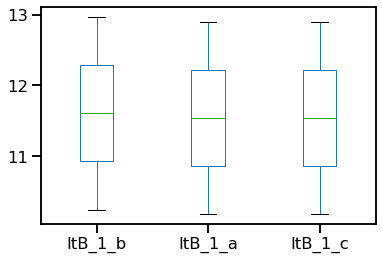

In [180]:
df.plot(kind='box')

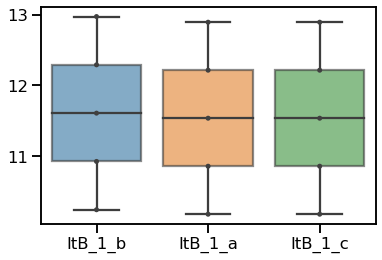

In [195]:
ax = sns.boxplot(data=df, boxprops=dict(alpha=.6))
ax = sns.swarmplot(data=df, color='.25')

In [79]:
data.keys()

dict_keys(['DFT_QE', 'GAP_it1_50s'])

In [84]:
for i in models:
    print(i, data.keys(), np.isin(i, np.array(data.keys())))

DFT_QE dict_keys(['DFT_QE', 'GAP_it1_50s']) False
GAP_it1_50s dict_keys(['DFT_QE', 'GAP_it1_50s']) False


In [100]:
np.isin(i, list(data.keys()))

array(True)

'GAP_it1_50s'

In [94]:
np.array(data.keys(), dtype=str)

array("dict_keys(['DFT_QE', 'GAP_it1_50s'])", dtype='<U64')

## Bulk Properties
```
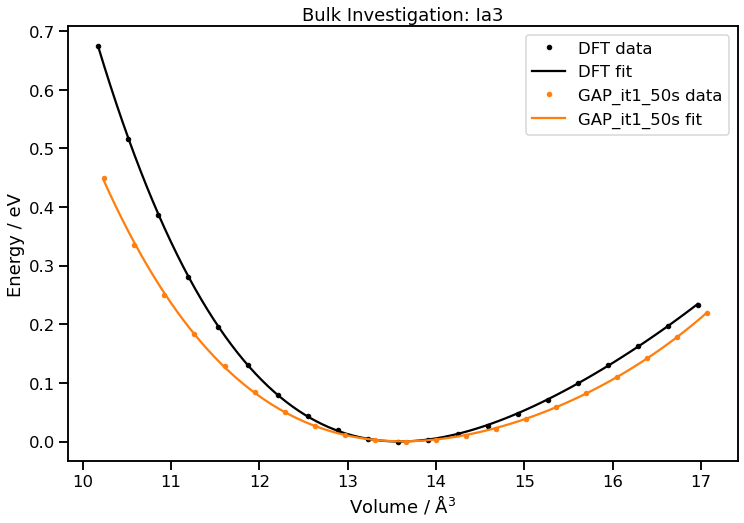
```
As well as the energy volume curve, the bulk test computes a number of other bulk properties, which we can tabulate:

In [60]:
df = pd.DataFrame(data)
df.drop('E_vs_V')

,GAP_it1_50s
c11,167.440418
c12,70.843958
c13,40.789197
c22,184.776555
c23,60.981165
c33,140.147565
c44,51.734007
c55,61.211408
c66,40.346927


## Adding a new model

Let's define a model for the screened Tersoff potential as implemented in `atomistica`. This is as simple as creating a `model.py` file in the `models/TersoffScr` directory.

In [54]:
![[ ! -d ../models/TersoffScr ]] && mkdir ../models/TersoffScr

with open("../models/TersoffScr/model.py", "w") as f:
    f.write("""
from atomistica import TersoffScr

calculator = TersoffScr()
name = 'TersoffScr'
no_checkpoint = True
""")

## Rerunning a single test with the new model

We can rerun an individual test with the `run-model-test.py` script: this takes the name of the model and of the test as arugments, and usually captures the output to a logfile. The `-l` option gives a label for the set of calculations; here we use `"Si"` to match with what was done for the GAP and DFT tests.

In [111]:
 !python ../../../scripts/run-model-test.py -l Si TersoffScr bulk_Si_diamond

share_dir /home/jovyan/scripts/../share


If we try to run the test again, it notices the `.json` file is present and avoids rerunning - this time we add the `-N` option to turn off capturing of stdout so we can see it directly in the notebook:

In [112]:
 !python ../../../scripts/run-model-test.py -N -l Si TersoffScr bulk_Si_diamond

share_dir /home/jovyan/scripts/../share
../Si-model-TersoffScr-test-bulk_Si_diamond-properties.json already exists and is not empty, not rerunning test


## Repeating the postprocessing analysis

Now we can go back and add the `TersoffScr` results to our energy-volume plot and data table:

,CASTEP_ASE,GAP,TersoffScr
B,88.596697,88.810217,96.897975
c12,56.25009,57.523404,74.571981
c11,153.28991,151.383845,141.549961
c44,72.17693,67.863739,68.82712
a0,5.461022,5.460805,NaN


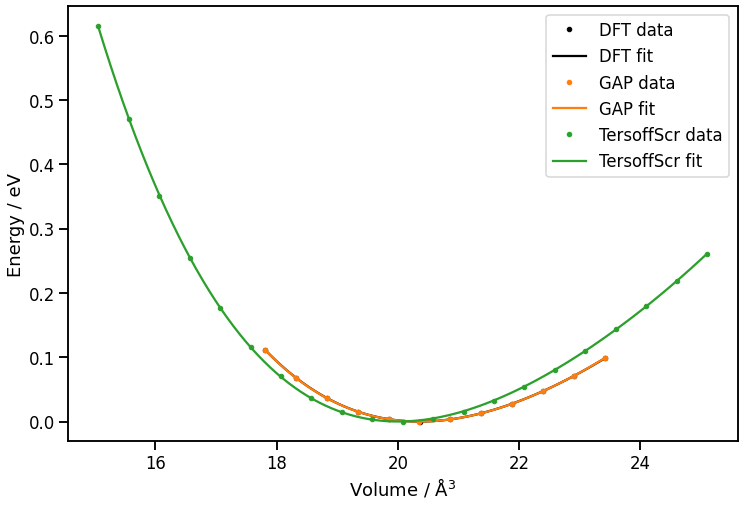

In [129]:
data = read_data(['CASTEP_ASE', 'GAP', 'TersoffScr'])
plot_e_vs_v(data, ref_model_name)

display(pd.DataFrame(data).drop('E_vs_V'))

The `NaN` for **a0** indicates missing data, not a failure with the test: the `bulk_Si_diamond` test no longer stores the lattice constant, but instead saves the full relaxed cell, which we can read in and visualise:

In [128]:
atoms = read('Si-model-TersoffScr-test-bulk_Si_diamond-relaxed.xyz')
v = nglview.show_ase(atoms * 3, cell=True)
v.add_unitcell()
v

NGLWidget()

We can update our data table accordingly:

In [136]:
data['TersoffScr']['a0'] = atoms.cell[0, 0] * 2.0
display(pd.DataFrame(data).drop('E_vs_V'))

,CASTEP_ASE,GAP,TersoffScr
B,88.596697,88.810217,96.897975
c12,56.25009,57.523404,74.571981
c11,153.28991,151.383845,141.549961
c44,72.17693,67.863739,68.82712
a0,5.461022,5.460805,5.436147


## Running all model/test pairs

To fill in results for missing model/test pairs, we could use the `run-all.py` script. By default this would run all pairs, but here we restrict to our new model to fill in the remainder of the tests with the `TersoffScr` potential.

This takes a few minutes to complete.

In [59]:
 !python ../../../scripts/run-all.py -s Si --models TersoffScr

Models asked for:  ['TersoffScr']
Models path:  /home/jovyan/example_models/Si/run_dir/../models
Models found:  ['/home/jovyan/example_models/Si/run_dir/../models/TersoffScr/model.py']
Models: ['/home/jovyan/example_models/Si/run_dir/../models/TersoffScr']
Tests: [('/home/jovyan/scripts/../tests/Si/qha_diamond', 'Si'), ('/home/jovyan/scripts/../tests/Si/bulk_Si_simple_hexagonal', 'Si'), ('/home/jovyan/scripts/../tests/Si/surface-decohesion-111-unrelaxed', 'Si'), ('/home/jovyan/scripts/../tests/Si/bulk_Si_bc8', 'Si'), ('/home/jovyan/scripts/../tests/Si/bulk_Si_hcp', 'Si'), ('/home/jovyan/scripts/../tests/Si/surface-decohesion-110-unrelaxed', 'Si'), ('/home/jovyan/scripts/../tests/Si/phonon_bulks', 'Si'), ('/home/jovyan/scripts/../tests/Si/bulk_Si_fcc', 'Si'), ('/home/jovyan/scripts/../tests/Si/bulk_Si_hexagonal_diamond', 'Si'), ('/home/jovyan/scripts/../tests/Si/surface-decohesion-100-unrelaxed', 'Si'), ('/home/jovyan/scripts/../tests/Si/bulk_Si_hcp_sf', 'Si'), ('/home/jovyan/scripts/..